<a href="https://colab.research.google.com/github/qarni4126-ui/Logistic_Regression_Proj/blob/main/logistic_reg_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [103]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
df['survived'].unique()

array([0, 1])

In [118]:
#Drop missing values
df = df.dropna()

In [119]:
# Convert all categorical features into numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [106]:
x=df.drop('survived',axis=1)
y=df['survived']

In [107]:
x

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
1,1,38.0,1,0,71.2833,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,False,True,...,True,False,True,False,False,False,False,False,True,True
6,1,54.0,0,0,51.8625,True,True,True,False,True,...,False,False,False,False,True,False,False,False,True,False
10,3,4.0,1,1,16.7000,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,True
11,1,58.0,0,0,26.5500,False,True,False,False,True,...,True,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,47.0,1,1,52.5542,False,False,False,False,True,...,True,False,False,True,False,False,False,False,True,True
872,1,33.0,0,0,5.0000,True,True,True,False,True,...,False,True,False,False,False,False,False,False,True,False
879,1,56.0,0,1,83.1583,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
887,1,19.0,0,0,30.0000,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,True


In [96]:
df.select_dtypes(include=np.number).corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.037698,-0.251045,0.101376,0.018739,0.130632
pclass,-0.037698,1.000000,-0.305708,-0.105262,0.046273,-0.316796
age,-0.251045,-0.305708,1.000000,-0.154160,-0.269757,-0.090730
sibsp,0.101376,-0.105262,-0.154160,1.000000,0.253478,0.284841
parch,0.018739,0.046273,-0.269757,0.253478,1.000000,0.388540
fare,0.130632,-0.316796,-0.090730,0.284841,0.388540,1.000000


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [98]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')

In [99]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [100]:
classifier_reg=GridSearchCV(classifier,param_grid=parameters,scoring='accuracy',cv=5)

In [101]:
classifier_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [112]:
print(classifier_reg.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l1'}


In [113]:
print(classifier_reg.best_score_)

1.0


In [114]:
y_pred = classifier_reg.predict(x_test)

In [115]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [116]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        24

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



/tmp/ipython-input-2551034736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="Set2")


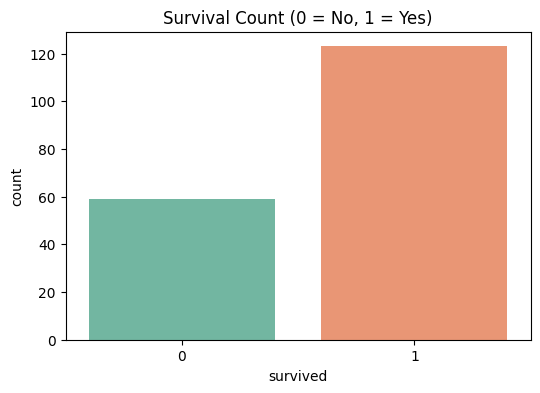

In [127]:
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df, palette="Set2")
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

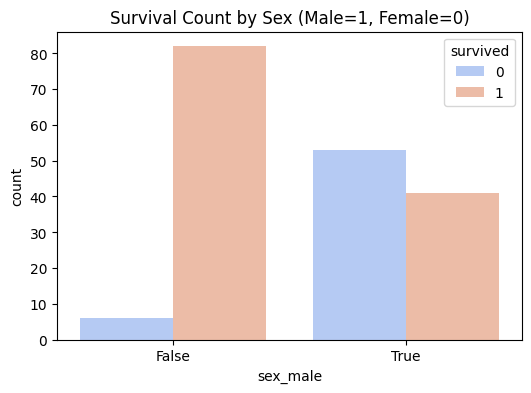

In [131]:
plt.figure(figsize=(6,4))
sns.countplot(x="sex_male", hue="survived", data=df, palette="coolwarm")
plt.title("Survival Count by Sex (Male=1, Female=0)")
plt.show()